In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection, tree, metrics,svm
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, roc_auc_score
from sklearn.preprocessing import Normalizer, StandardScaler
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from lightgbm import LGBMRegressor
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\train_v9rqX0R.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [216]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat':'Low Fat','low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular','Regular':'Regular'})
data['Item_Fat_Content'] = data['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [217]:
data['Item_Type'] = data['Item_Type'].map({'Dairy':'Unhealthy', 'Soft Drinks':'Unhealthy', 'Meat':'Unhealthy', 'Fruits and Vegetables':'Healthy',
       'Household':'Healthy', 'Baking Goods':'Unhealthy', 'Snack Foods':'Unhealthy', 'Frozen Foods':'Healthy',
       'Breakfast':'Healthy', 'Health and Hygiene':'Healthy', 'Hard Drinks':'Unhealthy', 'Canned':'Unhealthy',
       'Breads':'Healthy', 'Starchy Foods':'Healthy', 'Others':'Others', 'Seafood':'Healthy'})
data['Item_Type'] = data['Item_Type'].map({'Unhealthy':0,'Healthy':1,'Others':2})

In [218]:
data.Outlet_Size.fillna('Medium', inplace=True)
data.Outlet_Size.unique()
data['Outlet_Size'] = data['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [219]:
data.Outlet_Location_Type.unique()
data['Outlet_Location_Type'] = data['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [220]:
data.Outlet_Type.unique()
data['Outlet_Type'] = data['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})

[]

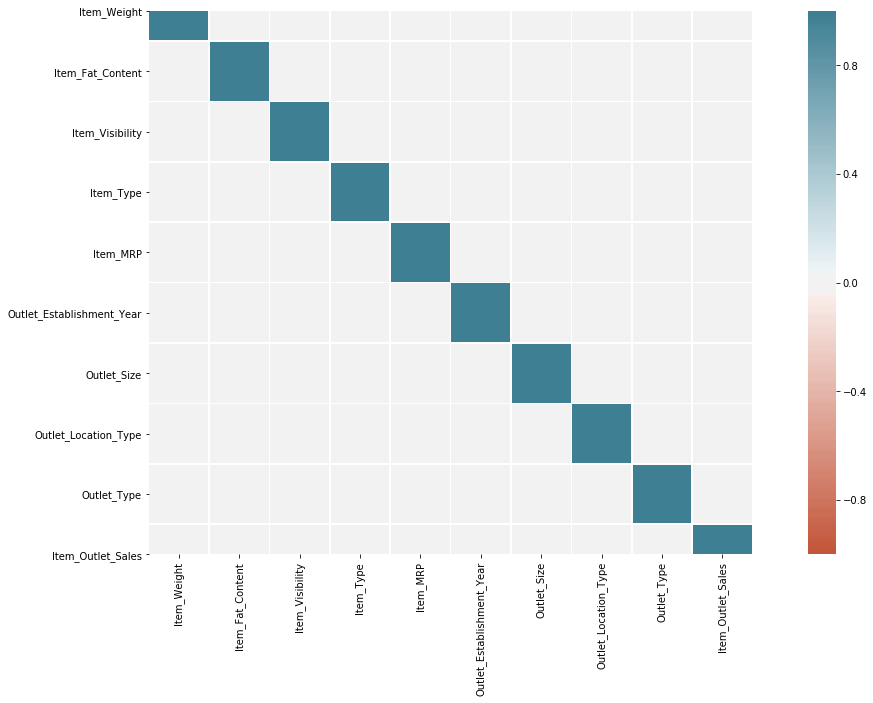

In [221]:
corr = data.corr()
plt.figure(figsize=(20,10))
ax = sns.heatmap(
    corr>0.9, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,linewidths=0.5
)
ax.plot()

In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 799.1+ KB


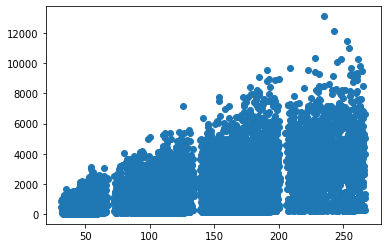

In [223]:
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.show()

In [224]:
data['Item_Weight'].fillna((data['Item_Weight'].median()), inplace=True)
data['Item_Visibility'] = data['Item_Visibility'].replace(0.000000, data['Item_Visibility'].median())

In [210]:
X = data.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales','Outlet_Establishment_Year'], axis=1)
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,0,249.8092,1,0,1
1,5.920,1,0.019278,0,48.2692,1,2,2
2,17.500,0,0.016760,0,141.6180,1,0,1
3,19.200,1,0.053931,1,182.0950,1,2,0
4,8.930,0,0.053931,1,53.8614,2,2,1
5,10.395,1,0.053931,0,51.4008,1,2,2
6,13.650,1,0.012741,0,57.6588,2,2,1
7,12.600,0,0.127470,0,107.7622,1,2,3
8,16.200,1,0.016687,1,96.9726,1,1,1
9,19.200,1,0.094450,1,187.8214,1,1,1


In [211]:
y = pd.DataFrame(data['Item_Outlet_Sales'], columns=['Item_Outlet_Sales'])
y

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
5,556.6088
6,343.5528
7,4022.7636
8,1076.5986
9,4710.5350


In [212]:
test_size = 0.3
seed = 3
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, test_size = test_size, random_state = seed)

In [213]:
models = []
models.append(('Linear', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GB', XGBRegressor()))
models.append(('Forest', RandomForestRegressor()))
models.append(('Light', LGBMRegressor()))
models.append(('ADA', AdaBoostRegressor()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('Bayesian RIdge', BayesianRidge()))
models.append(('SVM', svm.SVR()))
models.append(('KNN', KNeighborsRegressor()))


In [214]:
model_comp = pd.DataFrame(columns=['Model', 'RMSE'])


for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    rmse = sqrt(mean_squared_error(y_valid, y_pred))
    model_comp = model_comp.append([{'Model': name, 'RMSE': rmse}])

model_comp


[16:41:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model,RMSE
0,Linear,1184.613765
0,CART,1545.722618
0,GB,1064.870242
0,Forest,1130.215457
0,Light,1098.738278
0,ADA,1220.045564
0,Ridge,1184.560100
0,Lasso,1184.407152
0,Bayesian RIdge,1184.523261
0,SVM,1548.654277


In [186]:
models[2][1]

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [187]:
data_test = pd.read_csv(r"C:\Users\panda4\Documents\Data Science\Online\test_AbJTz2l.csv")
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,NaN,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,NaN,Tier 2,Supermarket Type1
9,FDA36,5.985,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [188]:
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].map({'Low Fat':'Low Fat','low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular','Regular':'Regular'})
data_test['Item_Fat_Content'] = data_test['Item_Fat_Content'].map({'Low Fat':0,'Regular':1})

In [189]:
data_test['Item_Type'] = data_test['Item_Type'].map({'Dairy':'Unhealthy', 'Soft Drinks':'Unhealthy', 'Meat':'Unhealthy', 'Fruits and Vegetables':'Healthy',
       'Household':'Healthy', 'Baking Goods':'Unhealthy', 'Snack Foods':'Unhealthy', 'Frozen Foods':'Healthy',
       'Breakfast':'Healthy', 'Health and Hygiene':'Healthy', 'Hard Drinks':'Unhealthy', 'Canned':'Unhealthy',
       'Breads':'Healthy', 'Starchy Foods':'Healthy', 'Others':'Others', 'Seafood':'Healthy'})
data_test['Item_Type'] = data_test['Item_Type'].map({'Unhealthy':0,'Healthy':1,'Others':2})

In [190]:
data_test.Outlet_Size.fillna('Medium', inplace=True)
data_test.Outlet_Size.unique()
data_test['Outlet_Size'] = data_test['Outlet_Size'].map({'Small':0, 'Medium':1, 'High':2})

In [191]:
data_test.Outlet_Location_Type.unique()
data_test['Outlet_Location_Type'] = data_test['Outlet_Location_Type'].map({'Tier 1':0,'Tier 2':1,'Tier 3':2})

In [192]:
data_test.Outlet_Type.unique()
data_test['Outlet_Type'] = data_test['Outlet_Type'].map({'Grocery Store':0,'Supermarket Type1':1, 'Supermarket Type2':2,'Supermarket Type3':3})

In [193]:
subm['Item_Identifier'] = data_test['Item_Identifier']
subm['Outlet_Identifier'] = data_test['Outlet_Identifier']
subm

,Item_Outlet_Sales,Item_Identifier,Outlet_Identifier
0,1643.913696,FDW58,OUT049
1,1380.744507,FDW14,OUT017
2,586.865906,NCN55,OUT010
3,2628.472168,FDQ58,OUT017
4,5542.585938,FDY38,OUT027
5,1893.785767,FDH56,OUT046
6,588.245483,FDL48,OUT018
7,2166.548584,FDC48,OUT027
8,1484.562988,FDN33,OUT045
9,3131.974121,FDA36,OUT017


In [194]:
data_test['Item_Weight'].fillna((data_test['Item_Weight'].median()), inplace=True)
data_test = data_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
data_test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750,0,0.007565,0,107.8622,1999,1,0,1
1,8.300,1,0.038428,0,87.3198,2007,1,1,1
2,14.600,0,0.099575,2,241.7538,1998,1,2,0
3,7.315,0,0.015388,0,155.0340,2007,1,1,1
4,12.500,1,0.118599,0,234.2300,1985,1,2,3
5,9.800,1,0.063817,1,117.1492,1997,0,0,1
6,19.350,1,0.082602,0,50.1034,2009,1,2,2
7,12.500,0,0.015782,0,81.0592,1985,1,2,3
8,6.305,1,0.123365,0,95.7436,2002,1,1,1
9,5.985,0,0.005698,0,186.8924,2007,1,1,1


In [195]:
predictions = models[2][1].predict(data_test)
subm['Item_Outlet_Sales'] = np.abs(predictions)
subm.to_csv('submission.csv', index=False)